In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.options.display.float_format = '{:f}'.format

In [2]:
from scipy.stats import rv_continuous
def inheritors(klass):
    subclasses = set()
    work = [klass]
    while work:
        parent = work.pop()
        for child in parent.__subclasses__():
            name = child.__name__
            if name not in subclasses:
                subclasses.add(name)
                work.append(child)
    return subclasses
result = list(sorted(map(str, inheritors(rv_continuous))))
dist_names = [x[:-4] for x in result]

In [3]:
def find_distribution(d):
    import scipy.stats
    from scipy.stats import kstest
    import multiprocessing
    import warnings
    import signal
    warnings.filterwarnings('ignore')
    run = [False]
    start = 0

    def signal_handler(signum, frame):
        if run:
            raise RuntimeError("Timed out!")

    signal.signal(signal.SIGALRM, signal_handler)


    for dist_name in dist_names[start:]:
        try:
            dist = getattr(scipy.stats, dist_name)
        except:
#             print("Not found: ", dist_name)
            continue
        try:
            signal.alarm(5)
            run[0] = True
            p = dist.fit(d, method='MLE')
        except RuntimeError as e:
#             print("Timeout: ", dist_name)
            continue
        except Exception as e:
#             print("Error: ", dist_name, e)
            continue
        finally:
            run[0] = False
            signal.alarm(0)
        res = kstest(d, dist(*p).cdf)
        if res.pvalue > 0.0:
            print(dist_name, "pvalue=", res.pvalue, p)
    #     else:
    #         print(dist_name, "fail", res.pvalue)

In [4]:
full_df = pd.read_csv('Telecom_customer.csv')
full_df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.997500,219.250000,22.500000,0.247500,0.000000,0.000000,0.000000,0.000000,0.000000,-157.250000,...,0.000000,N,U,U,U,U,U,Y,361.000000,1000001
1,57.492500,482.750000,37.425000,0.247500,22.750000,9.100000,9.100000,0.000000,0.000000,532.250000,...,0.000000,Z,U,U,U,U,U,Y,240.000000,1000002
2,16.990000,10.250000,16.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.250000,...,0.000000,N,U,Y,U,U,U,Y,1504.000000,1000003
3,38.000000,7.500000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.500000,...,0.000000,U,Y,U,U,U,U,Y,1812.000000,1000004
4,55.230000,570.500000,71.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.500000,...,0.000000,I,U,U,U,U,U,Y,434.000000,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,S,U,U,U,Y,U,Y,773.000000,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,N,U,U,Y,Y,Y,Y,835.000000,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,U,Y,Y,U,U,U,N,433.000000,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,S,U,U,U,U,U,N,75.000000,1099999


In [5]:
features = ['mou_Mean', 'change_mou', 'ovrmou_Mean']

df = full_df[features]
df

,mou_Mean,change_mou,ovrmou_Mean
0,219.250000,-157.250000,0.000000
1,482.750000,532.250000,22.750000
2,10.250000,-4.250000,0.000000
3,7.500000,-1.500000,0.000000
4,570.500000,38.500000,0.000000
...,...,...,...
99995,NaN,NaN,NaN
99996,NaN,NaN,NaN
99997,NaN,NaN,NaN
99998,NaN,NaN,NaN


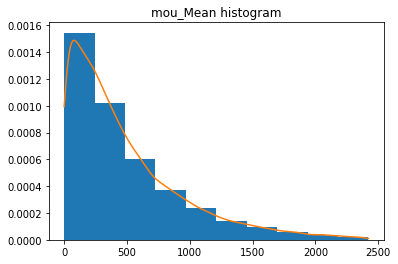

                 0
count 98647.000000
mean    488.201755
std     457.133930
min       0.000000
25%     149.000000
50%     351.000000
75%     687.708333
max    2422.500000


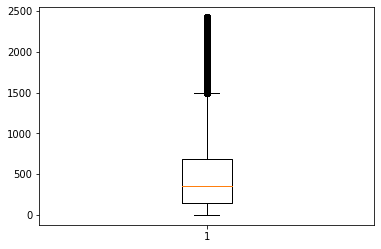

In [6]:
from scipy.stats import gaussian_kde, trimboth, trim1

feature = 'mou_Mean'
data = df[feature].dropna()
d = data.to_numpy()
d = trim1(d, 0.01, 'right')

bins = 10
plt.hist(d, bins=bins, density=True)

kde = gaussian_kde(d)
tiks = np.arange(d.min(), d.max() + 1, 1)
plt.plot(tiks, kde(tiks))

plt.title("%s histogram" % feature)
plt.show()

print(pd.DataFrame(d).describe())
plt.boxplot(d)
plt.show()

In [7]:
find_distribution(d)

beta pvalue= 1.414329241915867e-25 (0.8909652882744945, 6.522909553980277, -6.392771446111415e-28, 4009.929597467579)
betaprime pvalue= 9.89948350687711e-97 (7.3921690150197765, 2.8923749659486706, -122.33155467906843, 164.8311207240269)
burr12 pvalue= 3.562593008475678e-34 (2693850578.53409, 0.011013816176575549, -14588239046.802408, 14588239043.369778)
chi2 pvalue= 1.093922960584576e-50 (1.9105642953993356, -1.3424370783612005e-14, 278.0698948270303)
chi pvalue= 1.3394040865978519e-80 (0.6948929986496541, -9.030334921306552e-27, 794.4530275252987)
erlang pvalue= 4.2457561270463527e-166 (0.9227152641084269, -5.075311918713612e-12, 509.1568983132279)
expon pvalue= 1.3830310926552053e-31 (0.0, 488.2017551640201)
exponnorm pvalue= 6.47677050113948e-32 (1707.9806675683694, -0.7762962248768954, 0.2849468545992411)
exponpow pvalue= 3.618222245547328e-198 (0.6979500648441551, -6.281326810616544e-28, 954.1936503597456)
gamma pvalue= 4.167097269789569e-153 (0.8669577950629629, -1.2163315036042

(0.6951349051886443, 4.292460868152905, 38.06044763137892, 3229.765715421332)


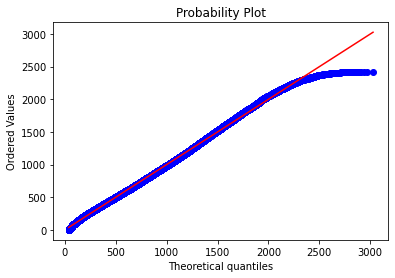

(0.8909652882744945, 6.522909553980277, -6.392771446111415e-28, 4009.929597467579)


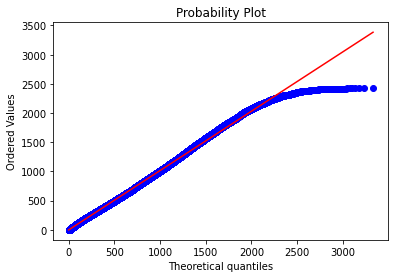

KstestResult(statistic=0.01713040128164367, pvalue=1.414329241915867e-25)


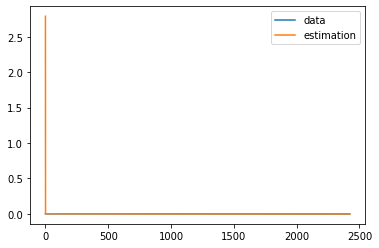

In [8]:
from scipy.stats import beta, probplot, kstest

dist = beta

p = dist.fit(d, method='MM')
print(p)
probplot(d, plot=plt, dist=dist(*p))
plt.show()

p = dist.fit(d, method='MLE')
print(p)
probplot(d, plot=plt, dist=dist(*p))
plt.show()

print(kstest(d, dist(*p).cdf))

kde = gaussian_kde(d)
tiks = np.arange(d.min(), d.max() + 1, 1)
plt.plot(tiks, kde(tiks), label='data')
plt.plot(tiks, dist(*p).pdf(tiks), label='estimation')
plt.legend()
plt.show()

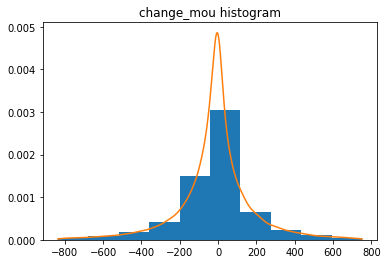

                 0
count 97127.000000
mean    -13.307851
std     194.940937
min    -836.000000
25%     -84.500000
50%      -6.250000
75%      60.500000
max     751.500000


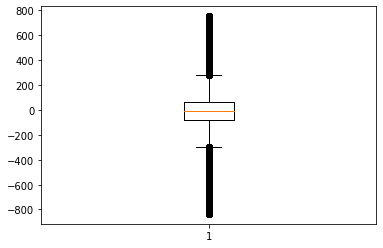

In [9]:
feature = 'change_mou'
data = df[feature].dropna()
d = data.to_numpy()
d = trimboth(d, 0.01)

bins = 10
plt.hist(d, bins=bins, density=True)

kde = gaussian_kde(d)
tiks = np.arange(d.min(), d.max() + 1, 1)
plt.plot(tiks, kde(tiks))

plt.title("%s histogram" % feature)
plt.show()

print(pd.DataFrame(d).describe())
plt.boxplot(d)
plt.show()

In [ ]:
find_distribution(d)

cauchy pvalue= 3.774044931979042e-70 (-8.147766976463735, 68.35607771347998)
dgamma pvalue= 5.3636899417648044e-307 (0.7754620314465828, -3.1311133883064164e-30, 184.7629783681923)
dweibull pvalue= 4.685042789818979e-231 (0.8554844531343577, -14.750000000000004, 118.60902623626474)
gennorm pvalue= 1.1431880999395745e-164 (0.6435399489365499, -2.5000000016479866, 51.40801947861701)
johnsonsu pvalue= 1.4935155202537634e-66 (0.03844106679829963, 0.7693042316300946, -5.630562240432735, 72.58003524292295)
laplace_asymmetric pvalue= 2.456765713560674e-157 (1.041403142854333, -3.000000071705305, 127.00912546985612)
laplace pvalue= 2.9357009215242646e-238 (-6.25, 127.25725639283476)


In [ ]:
from scipy.stats import exponnorm

dist = exponnorm

p = dist.fit(d, method='MM')
print(p)
probplot(d, plot=plt, dist=dist(*p))
plt.show()

p = dist.fit(d, method='MLE')
print(p)
probplot(d, plot=plt, dist=dist(*p))
plt.show()

print(kstest(d, dist(*p).pdf))

kde = gaussian_kde(d)
tiks = np.arange(d.min(), d.max() + 1, 1)
plt.plot(tiks, kde(tiks), label='data')
plt.plot(tiks, dist(*p).pdf(tiks), label='estimation')
plt.legend()
plt.show()

In [ ]:
feature = 'ovrmou_Mean'
data = df[feature].dropna()
d = data.to_numpy()
d = trimboth(d, 0.05)

bins = 10
plt.hist(d, bins=bins, density=True)

kde = gaussian_kde(d)
tiks = np.arange(d.min(), d.max() + 1, 1)
plt.plot(tiks, kde(tiks))

plt.title("%s histogram" % feature)
plt.show()

print(pd.DataFrame(d).describe())
plt.boxplot(d)
plt.show()

In [ ]:
find_distribution(d)

In [ ]:
from scipy.stats import gompertz

dist = gompertz

p = dist.fit(d, method='MM')
print(p)
probplot(d, plot=plt, dist=dist(*p))
plt.show()

p = dist.fit(d, method='MLE')
print(p)
probplot(d, plot=plt, dist=dist(*p))
plt.show()

print(kstest(d, dist(*p).pdf))

kde = gaussian_kde(d)
tiks = np.arange(d.min(), d.max() + 1, 1)
plt.plot(tiks, kde(tiks), label='data')
plt.plot(tiks, dist(*p).pdf(tiks), label='estimation')
plt.legend()
plt.show()